# Trendyol Bootcamp Capstone: Fashion Recommendation

### CONTENT
* **Data Exploration & Preperation**
    * Customers
    * Transactions
    * Articles
#
* **Hybrid LightFM Model**
    * Features
    * Dataset
    * Train-Test Split
    * Model fit
    * Evaluation 
#
* **Pure CF LightFM Model**
    * Model fit
    * Evaluation


In [1]:
import pandas as pd
import numpy as np
import matplotlib 

In [193]:
articles = pd.read_csv("data/articles.csv")
customers = pd.read_csv("data/customers.csv")
transactions = pd.read_csv("data/transactions.csv")

In [194]:
print("Articles shape: ", articles.shape)
print("Customers shape: ", customers.shape)
print("Transactions shape: ", transactions.shape)

Articles shape:  (105542, 25)
Customers shape:  (1371980, 4)
Transactions shape:  (31788324, 5)


### Data Exploration & Preperation

##### Customers

In [195]:
customers.head()

,customer_id,club_member_status,fashion_news_frequency,age
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,ACTIVE,NONE,49.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,ACTIVE,NONE,25.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,ACTIVE,NONE,24.0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,ACTIVE,NONE,54.0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,ACTIVE,Regularly,52.0


In [196]:
customers['fashion_news_frequency'].value_counts(dropna=False)

NONE         877711
Regularly    477416
NaN           16009
Monthly         842
None              2
Name: fashion_news_frequency, dtype: int64

In [197]:
# None converted to NONE, Monthly converted to Regularly, NaN converted to None

customers['fashion_news_frequency'] = customers['fashion_news_frequency'].replace(['NONE'],'None')
customers['fashion_news_frequency'] = customers['fashion_news_frequency'].replace(['Monthly'],'Regularly')
customers['fashion_news_frequency'].fillna('None', inplace=True)

customers.fashion_news_frequency.value_counts(dropna=False)


None         893722
Regularly    478258
Name: fashion_news_frequency, dtype: int64

In [198]:
customers['club_member_status'].value_counts(dropna=False)

ACTIVE        1272491
PRE-CREATE      92960
NaN              6062
LEFT CLUB         467
Name: club_member_status, dtype: int64

In [199]:
# NaN converted to ACTIVE

customers['club_member_status'].fillna('ACTIVE', inplace=True)
customers.club_member_status.value_counts(dropna=False)


ACTIVE        1278553
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64

<AxesSubplot:>

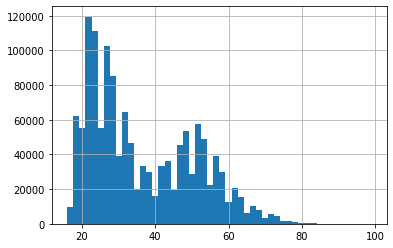

In [200]:
customers.age.hist(bins=50)

In [201]:
customers.loc[(customers['age'] < 26),  'age_group'] = '16-25'
customers.loc[((customers['age'] > 25) & (customers['age'] < 46)),  'age_group'] = '26-45'
customers.loc[((customers['age'] > 45) & (customers['age'] < 66)),  'age_group'] = '46-65'
customers.loc[((customers['age'] > 65) & (customers['age'] < 100)),  'age_group'] = '66-100'
customers = customers.drop(['age'], axis=1)

<AxesSubplot:>

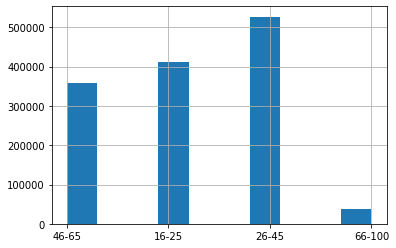

In [202]:
customers.age_group.hist()

##### Transactions

In [11]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [12]:
transactions.sales_channel_id.value_counts()

2    22379862
1     9408462
Name: sales_channel_id, dtype: int64

In [13]:
print(f"Start Date: {transactions.t_dat.min()}\nEnd Date: {transactions.t_dat.max()}")

Start Date: 2018-09-20
End Date: 2020-09-22


##### Articles

In [14]:
articles.head(2).T

,0,1
article_id,108775015,108775044
product_code,108775,108775
prod_name,Strap top,Strap top
product_type_no,253,253
product_type_name,Vest top,Vest top
product_group_name,Garment Upper body,Garment Upper body
graphical_appearance_no,1010016,1010016
graphical_appearance_name,Solid,Solid
colour_group_code,9,10
colour_group_name,Black,White


In [15]:
articles.product_group_name.value_counts()

Garment Upper body       42741
Garment Lower body       19812
Garment Full body        13292
Accessories              11158
Underwear                 5490
Shoes                     5283
Swimwear                  3127
Socks & Tights            2442
Nightwear                 1899
Unknown                    121
Underwear/nightwear         54
Cosmetic                    49
Bags                        25
Items                       17
Furniture                   13
Garment and Shoe care        9
Stationery                   5
Interior textile             3
Fun                          2
Name: product_group_name, dtype: int64

In [ ]:
# [ "product_group_name", "perceived_colour_master", "department_name", "index_group_name"]

In [16]:
articles["new_product_group"] = articles["product_group_name"]

articles.loc[articles['product_group_name'] == "Underwear/nightwear", 'new_product_group'] = "Underwear"

articles.loc[articles['product_group_name'] == "Cosmetic", 'new_product_group'] = "Accessories"
articles.loc[articles['product_group_name'] == "Bags", 'new_product_group'] = "Accessories"

articles.loc[articles['product_group_name'] == "Garment and Shoe care", 'new_product_group'] = "Shoes"

articles.loc[articles['product_group_name'] == "Items", 'new_product_group'] = "Other"
articles.loc[articles['product_group_name'] == "Furniture", 'new_product_group'] = "Other"
articles.loc[articles['product_group_name'] == "Interior textile", 'new_product_group'] = "Other"
articles.loc[articles['product_group_name'] == "Stationery", 'new_product_group'] = "Other"
articles.loc[articles['product_group_name'] == "Fun", 'new_product_group'] = "Other"
articles.loc[articles['product_group_name'] == "Unknown", 'new_product_group'] = "Other"

In [17]:
articles["new_colors"] = articles['perceived_colour_master_name'] 

articles.loc[articles['perceived_colour_master_name'] == "Khaki green", 'new_colors'] = "Green"
articles.loc[articles['perceived_colour_master_name'] == "Yellowish Green", 'new_colors'] = "Green"
articles.loc[articles['perceived_colour_master_name'] == "Bluish Green", 'new_colors'] = "Green"

articles.loc[articles['perceived_colour_master_name'] == "Metal", 'new_colors'] = "Grey"
articles.loc[articles['perceived_colour_master_name'] == "Mole", 'new_colors'] = "Grey"

articles.loc[articles['perceived_colour_master_name'] == "undefined", 'new_colors'] = "Unknown"


articles.new_colors.value_counts()

Black           22585
Blue            18469
White           12665
Grey            12327
Pink             9403
Green            6715
Red              5878
Beige            5657
Yellow           3121
Orange           2734
Brown            2269
Turquoise        1829
Lilac Purple     1100
Unknown           790
Name: new_colors, dtype: int64

In [21]:
customers["numeric_customer_id"] = customers.index

In [23]:
df_merge = customers.merge(
    transactions, how='left',
    left_on='customer_id', right_on='customer_id')

### Hybrid LightFM Model

In [24]:
from lightfm import LightFM
from lightfm.data import Dataset

C:\Users\Yesim Kebabcı\AppData\Local\Programs\Python\Python39\lib\site-packages\lightfm\_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn(


In [25]:
def generate_feature_list(dataframe, features_name):
    features = dataframe[features_name].apply(
        lambda x: ','.join(x.map(str)), axis=1)
    features = features.str.split(',')
    features = features.apply(pd.Series).stack().reset_index(drop=True)
    return features

In [26]:
def create_features(dataframe, features_name, id_col_name):
    features = dataframe[features_name].apply(
        lambda x: ','.join(x.map(str)), axis=1)
    features = features.str.split(',')
    features = list(zip(dataframe[id_col_name], features))
    return features


In [27]:
customers['customer_features'] = create_features(customers, ["club_member_status", "fashion_news_frequency", "age_group"], "numeric_customer_id")
# sample output = (0, [ACTIVE, None, 49.0]) #user id is zero since converted to numeric

articles['article_features'] = create_features(articles, [ "new_product_group", "new_colors", "department_name", "index_group_name"], "article_id")
# sample output = (108775015, ['Vest top', 'Garment Upper body', 'Black', 'Jersey Basic', 'Ladieswear'])


In [29]:
# customer_feature_list = generate_feature_list(customers, ["club_member_status", "fashion_news_frequency", "age_group"])
# article_feature_list  = generate_feature_list(articles, [ "new_product_group", "new_colors", "department_name", "index_group_name"])

In [30]:
# np.save("customer_ftr_list.npy", customer_feature_list)
# np.save("article_ftr_list.npy", article_feature_list)

In [31]:
customer_feature_list = np.load('customer_ftr_list.npy',allow_pickle=True)
article_feature_list = np.load('article_ftr_list.npy', allow_pickle=True)

In [32]:
len(customer_feature_list)
print(customer_feature_list)

['ACTIVE' 'None' '46-65' ... 'PRE-CREATE' 'None' '46-65']


In [33]:
df = pd.DataFrame(article_feature_list)

In [34]:
dataset = Dataset()

dataset.fit(
    set(customers['numeric_customer_id']), 
    set(articles['article_id']),
    item_features=article_feature_list, 
    user_features=customer_feature_list)

In [37]:
df_merge['num_item_per_user'] = df_merge.groupby(['customer_id'])['article_id'].transform('count')
# df_merge['num_trans_per_item'] = df_merge.groupby(['article_id'])['transaction_id'].transform('count')

In [39]:
# calculate our weight value 
# df_merge['total_weights'] = 1 / (
#     df_merge['num_item_per_user'])
# df_merge['customer_item_tuple'] = list(zip(
#     df_merge.numeric_customer_id, df_merge.article_id, df_merge.total_weights))

In [40]:
df_merge = df_merge.dropna()

df_merge['customer_item_tuple'] = list(zip(
    df_merge.numeric_customer_id, df_merge.article_id))

interactions, weights = dataset.build_interactions(
      df_merge['customer_item_tuple'])


In [41]:
df_merge['customer_item_tuple']

0                 (0, 625548001.0)
1                 (0, 176209023.0)
2                 (0, 627759010.0)
3                 (0, 697138006.0)
4                 (0, 568601006.0)
                     ...          
31798018    (1371978, 866755002.0)
31798019    (1371978, 840360003.0)
31798020    (1371978, 866755002.0)
31798021    (1371978, 882810001.0)
31798022    (1371979, 806050001.0)
Name: customer_item_tuple, Length: 31110542, dtype: object

In [42]:
# interaction and weights matrix succesfully built
# sample interaction output = 
# matrix([[0, 0, 0, ..., 0, 0, 0],
#         [0, 0, 0, ..., 0, 0, 0],
#         [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [43]:
# interaction and weights matrix succesfully built
# sample weights output (for default weights) = 
# matrix([[0, 0, 0, ..., 0, 0, 0],
#         [0, 0, 0, ..., 0, 0, 0],
#         [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [46]:
customers_features = dataset.build_user_features(
    customers['customer_features'])

articles_features = dataset.build_item_features(
    articles['article_features'])

In [48]:
customers_features.tocsr()[0,:].nonzero()

(array([0, 0, 0, 0]), array([      0, 1371980, 1371981, 1371982]))

In [49]:
from scipy import sparse
articles_features.tocsr()[[0,6],:].todense()
# articles_features.todense()

matrix([[0.2, 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ]], dtype=float32)

In [52]:
from lightfm.cross_validation import random_train_test_split
# from sklearn.model_selection import train_test_split

# To split a sample_weight matrix along the same lines, pass it into this function with the same random_state seed 
# as was used for splitting the interactions.

(train, test) = random_train_test_split(interactions=interactions, test_percentage=0.1, random_state=42)
(train_weight, test_weight) = random_train_test_split(interactions=weights, test_percentage=0.1, random_state=42)

In [54]:
model = LightFM(
    item_alpha=0.000001,
    loss='warp',
    #Weighted Approximate-Rank Pairwise loss
    random_state=2022
)

model.fit(
    train,
    item_features=articles_features,
    user_features=customers_features, 
    sample_weight=train_weight,
    epochs=50,
    num_threads=4, 
    verbose=True
    
    )

Epoch: 100%|██████████| 50/50 [4:29:21<00:00, 323.24s/it]  


In [55]:
from lightfm.evaluation import auc_score

In [62]:
test_score= auc_score(model, test,item_features=articles_features,user_features = customers_features, num_threads=4).mean()

In [63]:
test_score

0.918429

### Pure CF LightFM Model 

In [103]:
model_CF = LightFM(loss='warp',
                item_alpha=0.000001,
               )
model_CF = model_CF.fit(train, epochs=50, num_threads=4, verbose=True)

Epoch: 100%|██████████| 50/50 [1:59:41<00:00, 143.62s/it]


In [106]:
test_score_CF= auc_score(model_CF, test, num_threads=4).mean()

In [107]:
test_score_CF

0.9369683

In [232]:
predictions_CF = model_CF.predict(  
    589888, 
    interactions.col)


In [165]:
predictions_CF

array([-3.286026  , -3.5258942 , -3.6225402 , ..., -0.62545013,
       -3.647044  , -2.2237856 ], dtype=float32)

In [125]:
predictions_CF.min()

-6.7427354

In [203]:
predictions_CF.max()

2.2422965

In [220]:
recommended_item =  np.where(predictions_CF == predictions_CF.max())

In [219]:
recommended_item

(array([     381,      433,     1977, ..., 31108650, 31109220, 31109481],
       dtype=int64),)

In [221]:
print("User 589888 is recommended to buy", articles.iloc[381].prod_name,",", articles.iloc[433].prod_name, "and", articles.iloc[1977].prod_name, ".")

User 589888 is recommended to buy Cap Paco Solid CO , AOP Leggings and Washed Leather belt .
